# Load required packages

Depending on my choice of python notebook, I am going to need to install and load the following packages to perform topic modeling

In [1]:
# Installations
'''
!pip install pandas
!pip install numpy
!pip install gensim
!pip oinstall nltk
!pip install matplotlib.pyplot
!pip install qalsadi
!pip install pyLDAvis 
!pip install tomotopy
#!pip install git+https://github.com/rwalk/gsdmm.git
#!pip install tmplot
!pip install arabic_reshaper'''


'\n!pip install pandas\n!pip install numpy\n!pip install gensim\n!pip oinstall nltk\n!pip install matplotlib.pyplot\n!pip install qalsadi\n!pip install pyLDAvis \n!pip install tomotopy\n#!pip install git+https://github.com/rwalk/gsdmm.git\n#!pip install tmplot\n!pip install arabic_reshaper'

In [2]:

#Base and Cleaning 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from pprint import pprint
import pip
import setuptools
import tmplot as tmp



# loading some necessary packages 
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import ISRIStemmer
from nltk.stem.porter import *
import nltk
from nltk.corpus import stopwords
from gensim.models import CoherenceModel
import gensim.corpora as corpora
from gensim.models import CoherenceModel

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;
from bidi.algorithm import get_display
import arabic_reshaper


from gensim.models.nmf import Nmf as GensimNmf
from gsdmm import MovieGroupProcess
from gensim.models import AuthorTopicModel
import tomotopy as tp
from gensim import models
from statistics import mean 
import bitermplus as btm
from gensim.models import LdaSeqModel
import qalsadi.lemmatizer
from gensim.models import HdpModel


# Visualizations
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models



In [3]:
# Read the Dataset with pandas as a DATAFRAME
# add your data path 
data = pd.read_csv(r"C:\Users\PRO\Downloads\Tweets.csv",sep='\t',lineterminator='\n',on_bad_lines='skip')

data.head()

,بعد استقالة رئيس #المحكمة_الدستورية ننتظر استقالة #رئيس_القضاء #السودان,OBJ
0,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...,POS
1,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...,NEG
2,#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية ...,OBJ
3,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...,NEUTRAL
4,#انتخبوا_العرص #انتخبوا_البرص #مرسى_رئيسى #اين...,NEUTRAL


In [4]:
data.columns

Index(['بعد استقالة رئيس #المحكمة_الدستورية ننتظر استقالة #رئيس_القضاء #السودان', 'OBJ'], dtype='object')

In [5]:
# REnaming the textuel column that we are working on :
data = data.rename(columns = {'بعد استقالة رئيس #المحكمة_الدستورية ننتظر استقالة #رئيس_القضاء #السودان': 'text', 'OBJ': 'sentiment'}, inplace = False)

# Print out data
data


,text,sentiment
0,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...,POS
1,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...,NEG
2,#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية ...,OBJ
3,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...,NEUTRAL
4,#انتخبوا_العرص #انتخبوا_البرص #مرسى_رئيسى #اين...,NEUTRAL
...,...,...
9688,والغاز مش مدعوم يا إنسان؟ وماذا عن الأسمنت وال...,NEG
9689,اغلاق كل الساحات والميادين الكبرى لمنع صلاة ال...,NEG
9690,"#الشروق ""الداخلية"": 400 ألف مواطن تقدموا لأداء...",OBJ
9691,#هتحبك_لو صحتها من النوم علشان تقولها بحبك ;),POS


In [6]:
count_sentiment = data.sentiment.value_counts()
count_sentiment

OBJ        6469
NEG        1642
NEUTRAL     805
POS         777
Name: sentiment, dtype: int64

<AxesSubplot:>

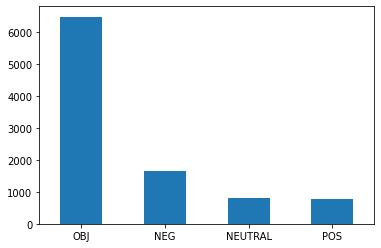

In [7]:
count_sentiment.plot.bar(rot = 0)

# Data Pre-processing


Our goal in the data pre-processing stage is to convert sentences into words, convert words to their root and removing words that are too common or too irrelevant to the purpose of our topic modeling project. We used the following techniques to reach our goal, I’m going to share the code and walk you through each stage:
   - Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
   - Words that have fewer than 3 characters are removed.
   - All stopwords are removed.
   - Words are lemmatized and stemmed — words in the third person are changed to first person and verbs in past and future tenses are changed into the present and are reduced to their root form.

In [8]:

data['text'] = data['text'].map(lambda x: x.replace("#", " ").replace("_", " ").replace("|", " ")
.replace("؟", "").replace("!", " ").replace('\"', " ").replace(';', "").replace(':', "").replace('(', "").replace(')', "").replace('،', " ").replace('-', " ").replace('…', ""))

In [9]:
data['text']

0       أهنئ الدكتور أحمد جمال الدين  القيادي بحزب مصر...
1       البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...
2        الحرية والعدالة   شاهد الآن  ليلة الاتحادية أ...
3       الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...
4        انتخبوا العرص  انتخبوا البرص  مرسى رئيسى  اين...
                              ...                        
9688    والغاز مش مدعوم يا إنسان وماذا عن الأسمنت والح...
9689    اغلاق كل الساحات والميادين الكبرى لمنع صلاة ال...
9690     الشروق  الداخلية  400 ألف مواطن تقدموا لأداء ...
9691           هتحبك لو صحتها من النوم علشان تقولها بحبك 
9692       كل شى كتبته غلط كل شى حسبته غلط فى  الامتحانات
Name: text, Length: 9693, dtype: object

In [10]:
#let's print out an example:
data['text'][2026]

'يازين  مضامير اشتقنا لها 😿'

In [11]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# let's check if nltk contains stopwords for arabic datasets

stopwords.fileids()

['arabic',
 'azerbaijani',
 'bengali',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [13]:
stopwords_list = stopwords.words('arabic')
print(stopwords_list)

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

### Removing stop words 

In [14]:
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))
data

,text,sentiment
0,أهنئ الدكتور أحمد جمال الدين القيادي بحزب مصر ...,POS
1,البرادعي يستقوى بامريكا مرةاخرى يرسل عصام العر...,NEG
2,الحرية والعدالة شاهد ليلة الاتحادية فيلم استقص...,OBJ
3,الوالدة اقولها بخاطري حشيشة تضحك اقولها ملل ال...,NEUTRAL
4,انتخبوا العرص انتخبوا البرص مرسى رئيسى اين رئي...,NEUTRAL
...,...,...
9688,والغاز مش مدعوم إنسان وماذا الأسمنت والحديد وا...,NEG
9689,اغلاق الساحات والميادين الكبرى لمنع صلاة العيد...,NEG
9690,الشروق الداخلية 400 مواطن تقدموا لأداء الحج وب...,OBJ
9691,هتحبك صحتها النوم علشان تقولها بحبك,POS


- while we are building a topic modeling project means that we are working on unsupervised machine learning project, which leads us to abondon the column of targe, but if we changed the project to a supervised ML, we can do that following the steps of a calssication model 

In [15]:
data_text = data[["text"]]
data_text["index"] = data_text.index
documents = data_text
documents

,text,index
0,أهنئ الدكتور أحمد جمال الدين القيادي بحزب مصر ...,0
1,البرادعي يستقوى بامريكا مرةاخرى يرسل عصام العر...,1
2,الحرية والعدالة شاهد ليلة الاتحادية فيلم استقص...,2
3,الوالدة اقولها بخاطري حشيشة تضحك اقولها ملل ال...,3
4,انتخبوا العرص انتخبوا البرص مرسى رئيسى اين رئي...,4
...,...,...
9688,والغاز مش مدعوم إنسان وماذا الأسمنت والحديد وا...,9688
9689,اغلاق الساحات والميادين الكبرى لمنع صلاة العيد...,9689
9690,الشروق الداخلية 400 مواطن تقدموا لأداء الحج وب...,9690
9691,هتحبك صحتها النوم علشان تقولها بحبك,9691


- Above the number two is the number of columns in our Dataset

In [16]:
# Checking The first row of the column text
data["text"][0]

'أهنئ الدكتور أحمد جمال الدين القيادي بحزب مصر بمناسبة صدور أولى روايته'

- The library used for the lemmatization in our case is [Qalsadi](https://pypi.org/project/qalsadi/)

In [17]:
#stemmer = ISRIStemmer() We possibly can use IRISStemer(), but the results wasn't done perfectly, which is going to effect 
# The results, lemmatizer is well enough for our case
def lemmatize_stemming(text):
    return qalsadi.lemmatizer.Lemmatizer().lemmatize(text)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stopwords_list and len(token) > 3:
            emoji_pattern = re.compile("["
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            "]+", flags=re.UNICODE)
            emoji_pattern.sub(r'', token)
            result.append(lemmatize_stemming(token))
    return result

#### Sample lemmatization :

In [18]:
doc_sample = documents[documents['index'] == 2026].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))


original document: 
['يازين', 'مضامير', 'اشتقنا', '😿']


 tokenized and lemmatized document: 
['يازين', 'مضامير', 'اشتاق']


### **Note:**
- **In this next part I will be using only 10 samples instead of the whole dataset to speed up the process.**

# Dropping missing values(Texts ) in the DataFrame if exist 

In [19]:
data.isnull().sum()

text         0
sentiment    0
dtype: int64

- After the results provided above we got zero null Value.
- It can be seen that this step isn't mainly important in such a kind of unsupervised learning 

In [20]:
documents = documents[:10]
documents

,text,index
0,أهنئ الدكتور أحمد جمال الدين القيادي بحزب مصر ...,0
1,البرادعي يستقوى بامريكا مرةاخرى يرسل عصام العر...,1
2,الحرية والعدالة شاهد ليلة الاتحادية فيلم استقص...,2
3,الوالدة اقولها بخاطري حشيشة تضحك اقولها ملل ال...,3
4,انتخبوا العرص انتخبوا البرص مرسى رئيسى اين رئي...,4
5,امير عيد اللي فعلا يتقال ستريكر صريح كاريوكي ا...,5
6,أحكي قصة حدثت شاب الفتيات بينهم حب كبير حدثت غ...,6
7,أدعوكم لحضور الندوة الثقافية الأربعاء مركز اعد...,7
8,عودة جماعة الإخوان الحياة السياسية بنفس وضعها ...,8
9,علاج السكري اف نتشورال السعودية العراق اليمن م...,9


In [21]:
for txt in documents['text']:
  print(preprocess(txt))

['هنأ', 'دكتور', 'حمد', 'جمال', 'دين', 'قياد', 'حزب', 'مناسب', 'صدور', 'أولى', 'رواية']
['برادع', 'يستقوى', 'بامريكا', 'مرةاخرى', 'رسل', 'عصام', 'عرى', 'واشنطن', 'مقرف']
['حر', 'عدال', 'شاهد', 'ليل', 'اتحاد', 'ألام', 'استقصاء', 'تناول', 'سرار', 'كواليس', 'تعرض', 'أول', 'حقيق']
['والد', 'اقولها', 'خاطر', 'حشيش', 'ضحك', 'اقولها', 'الله', 'كيل', 'أعطى', 'محاضر', 'فسق', 'فجور', 'جنوب', 'شيش', 'يانبع', 'حنان']
['انتخب', 'العرص', 'انتخب', 'برص', 'مرسى', 'رئيسى', 'رئيسى']
['امير', 'لي', 'علا', 'يتقال', 'ستريكر', 'صريح', 'كاريوكي', 'سك']
['حك', 'حدث', 'فت', 'بين', 'كبير', 'حدث', 'غلط', 'واحد', 'استمر', 'قصة', 'يتم']
['دع', 'حضور', 'ندوة', 'ثقاف', 'أربعاء', 'مركز', 'اعداد', 'قادة', 'تفاصيل']
['عود', 'جماع', 'إخوان', 'حياة', 'سياسة', 'نفس', 'وضع', 'سابق', 'مستحيل', 'والطرمخة', 'جرائم', 'ماضي', 'جعل', 'تقدم', 'شبر']
['علاج', 'سكر', 'نتشورال', 'سعودي', 'عراق', 'يمن', 'كويت', 'عمان', 'سوري', 'ليبي']


In [22]:
processed_docs = documents['text'].map(preprocess)

In [23]:
processed_docs

0    [هنأ, دكتور, حمد, جمال, دين, قياد, حزب, مناسب,...
1    [برادع, يستقوى, بامريكا, مرةاخرى, رسل, عصام, ع...
2    [حر, عدال, شاهد, ليل, اتحاد, ألام, استقصاء, تن...
3    [والد, اقولها, خاطر, حشيش, ضحك, اقولها, الله, ...
4       [انتخب, العرص, انتخب, برص, مرسى, رئيسى, رئيسى]
5    [امير, لي, علا, يتقال, ستريكر, صريح, كاريوكي, سك]
6    [حك, حدث, فت, بين, كبير, حدث, غلط, واحد, استمر...
7    [دع, حضور, ندوة, ثقاف, أربعاء, مركز, اعداد, قا...
8    [عود, جماع, إخوان, حياة, سياسة, نفس, وضع, سابق...
9    [علاج, سكر, نتشورال, سعودي, عراق, يمن, كويت, ع...
Name: text, dtype: object

In [24]:
type(processed_docs)

pandas.core.series.Series

### Bag of words:

Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

In [25]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [26]:
print(dictionary)

Dictionary(105 unique tokens: ['أولى', 'جمال', 'حزب', 'حمد', 'دكتور']...)


In [27]:
count = 0
for k, v in dictionary.iteritems():
    print(v, k)
    count += 1
    if count > 10:
        break

أولى 0
جمال 1
حزب 2
حمد 3
دكتور 4
دين 5
رواية 6
صدور 7
قياد 8
مناسب 9
هنأ 10



- read more about filter_extremes (https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.filter_extremes)

In [28]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

bow_corpus[1]

[(11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1)]

In [29]:
type(bow_corpus)

list

In [30]:
# SAmple of Topic 01
bow_doc_01 = bow_corpus[1]
for i in range(len(bow_doc_01)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_01[i][0], 
                                                     dictionary[bow_doc_01[i][0]], 
                                                     bow_doc_01[i][1]))

Word 11 ("بامريكا") appears 1 time.
Word 12 ("برادع") appears 1 time.
Word 13 ("رسل") appears 1 time.
Word 14 ("عرى") appears 1 time.
Word 15 ("عصام") appears 1 time.
Word 16 ("مرةاخرى") appears 1 time.
Word 17 ("مقرف") appears 1 time.
Word 18 ("واشنطن") appears 1 time.
Word 19 ("يستقوى") appears 1 time.


- Read More about  [BAG OF WORDS](https://www.tutorialspoint.com/gensim/gensim_creating_a_bag_of_words_corpus.htm)

### TF-IDF:



In [31]:

tfidf = gensim.models.TfidfModel(bow_corpus)

In [32]:
corpus_tfidf = tfidf[bow_corpus]

In [33]:
type(corpus_tfidf)

gensim.interfaces.TransformedCorpus

In [34]:
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3015113445777637),
 (1, 0.3015113445777637),
 (2, 0.3015113445777637),
 (3, 0.3015113445777637),
 (4, 0.3015113445777637),
 (5, 0.3015113445777637),
 (6, 0.3015113445777637),
 (7, 0.3015113445777637),
 (8, 0.3015113445777637),
 (9, 0.3015113445777637),
 (10, 0.3015113445777637)]


In [35]:
documents = data['text'].values
texts = [[word for word in str(document).split()] for document in documents]
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]

# Modeling Part:


- In this section we are going to use the topic modeling algorithms and calculte the most important measure "coherence"

# 1- Latent Dirichlet Allocation( LDA)

In [36]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [37]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.020*"عود" + 0.020*"نفس" + 0.020*"جرائم" + 0.020*"ماضي" + 0.020*"والطرمخة" + 0.020*"دكتور" + 0.020*"إخوان" + 0.020*"مناسب" + 0.020*"رواية" + 0.020*"سياسة"
Topic: 1 
Words: 0.059*"يتقال" + 0.059*"علا" + 0.059*"كاريوكي" + 0.059*"صريح" + 0.059*"ستريكر" + 0.059*"سك" + 0.059*"امير" + 0.059*"لي" + 0.005*"انتخب" + 0.005*"رئيسى"
Topic: 2 
Words: 0.010*"رئيسى" + 0.010*"مرسى" + 0.010*"انتخب" + 0.010*"حدث" + 0.010*"امير" + 0.010*"يستقوى" + 0.010*"سك" + 0.010*"لي" + 0.010*"واشنطن" + 0.010*"كاريوكي"
Topic: 3 
Words: 0.010*"رئيسى" + 0.010*"انتخب" + 0.010*"مرسى" + 0.010*"حدث" + 0.010*"لي" + 0.010*"واشنطن" + 0.010*"برادع" + 0.010*"برص" + 0.010*"صريح" + 0.010*"كواليس"
Topic: 4 
Words: 0.010*"مرسى" + 0.010*"رئيسى" + 0.010*"انتخب" + 0.010*"حدث" + 0.010*"لي" + 0.010*"كواليس" + 0.010*"امير" + 0.010*"يستقوى" + 0.010*"بامريكا" + 0.010*"ستريكر"
Topic: 5 
Words: 0.010*"انتخب" + 0.010*"رئيسى" + 0.010*"مرسى" + 0.010*"حدث" + 0.010*"امير" + 0.010*"يستقوى" + 0.010*"برادع" + 0.010*"سك" + 0.010*"ستر

### LDA Coherence with u_mass 

In [38]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, dictionary=dictionary, coherence='u_mass',corpus=bow_corpus)
coherence_lda_uMass = coherence_model_lda.get_coherence()
print('\nCoherence Score with u_mass: ', coherence_lda_uMass)


Coherence Score with u_mass:  -19.60954178406967


### LDA cohernece with c_v

In [39]:

# Compute Coherence Score with tfidf and u_mass parameter 
coherence_model_lda = CoherenceModel(model=lda_model, dictionary=dictionary, coherence='c_v', texts =processed_docs  )
coherence_lda_cv = coherence_model_lda.get_coherence()
print('\nCoherence Score with c_v: ', coherence_lda_cv)


Coherence Score with c_v:  0.5088837962117232


### LDA Cohernece with c_npmi

In [40]:
#corpus_tfidf
# Compute Coherence Score with tfidf and u_mass parameter 
coherence_model_lda = CoherenceModel(model=lda_model, dictionary=dictionary, coherence='c_npmi', texts =processed_docs  )
coherence_lda_npmi = coherence_model_lda.get_coherence()
print('\nCoherence Score with c_npmi: ', coherence_lda_npmi)


Coherence Score with c_npmi:  -0.42442102214656996


### LDA Cohernece with C_uci

In [41]:

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_uci')
coherence_lda_uci = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda_uci)


Coherence Score:  -16.484590063874208


### Optimal number of topics LDA 

The last step is to find the optimal number of topics.We need to build many LDA models with different values of the number of topics (k) and pick the one that gives the highest coherence value. Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics. If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

read more about how to implement this step: https://datascience.oneoffcoder.com/topic-modeling-gensim.html

In [42]:
results = []

for t in range(2,10):
    lda_model = gensim.models.LdaMulticore(bow_corpus, id2word=dictionary, passes=2, workers=2,num_topics=t)
    corpus_lda = lda_model[corpus_tfidf]

    cm = CoherenceModel(model=lda_model, corpus=corpus_lda, coherence='u_mass')
    score = cm.get_coherence()
    tup = t, score
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'score'])

In [43]:
results

,topic,score
0,2,-0.145426
1,3,0.000000
2,4,-0.508992
3,5,0.000000
4,6,-0.872559
5,7,-0.394729
6,8,-0.981628
7,9,-1.939019


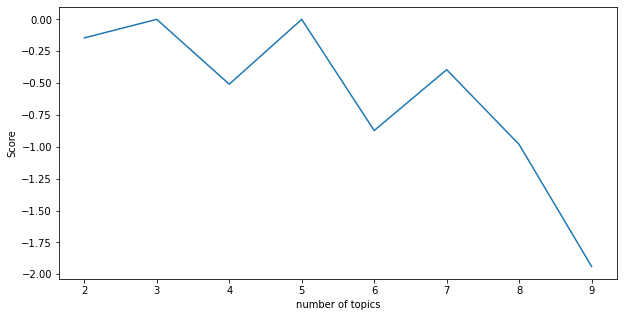

In [44]:
plt.figure(figsize = (10,5))
s = pd.Series(results.score.values, index=results.topic.values)
plt.xlabel("number of topics")
plt.ylabel("Score")
_ = s.plot()

In [45]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.186071  0.047845       1        1  17.622975
7     -0.100381  0.147406       2        1  17.610959
0     -0.035205 -0.128898       3        1  15.793242
8     -0.022480 -0.044531       4        1  14.744442
5     -0.014949 -0.022414       5        1  13.830384
2     -0.010656 -0.000065       6        1  10.179774
6     -0.004530 -0.003342       7        1   8.360201
3      0.001064  0.001999       8        1   0.929012
4      0.001065  0.002000       9        1   0.929012, topic_info=        Term      Freq     Total Category  logprob  loglift
63       حدث  1.000000  1.000000  Default   30.000  30.0000
34    اقولها  1.000000  1.000000  Default   29.000  29.0000
51     رئيسى  1.000000  1.000000  Default   28.000  28.0000
49     انتخب  1.000000  1.000000  Default   27.000  27.0000
72     اعداد  0.000000  0.000000  Default   26.000  26.0000
..       ...       ...       ...      ...      ...      ...
4      دكتور  0.009644  1.056892   Topic9   -4.654  -0.0179
13       رسل  0.009644  1.055412   Topic9   -4.654  -0.0165
53      امير  0.009644  1.029507   Topic9   -4.654   0.0083
103  نتشورال  0.009644  1.029508   Topic9   -4.654   0.0083
48     العرص  0.009644  1.055841   Topic9   -4.654  -0.0169

[431 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
33        4  0.970748    أعطى
20        1  0.947112    ألام
21        1  0.947111     أول
0         2  0.946169    أولى
80        5  0.985656   إخوان
...     ...       ...     ...
47        4  0.970749   يانبع
60        3  0.971340   يتقال
70        6  1.067098     يتم
19        2  0.947305  يستقوى
104       3  0.971338     يمن

[96 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 8, 1, 9, 6, 3, 7, 4, 5])

# 2- LDA Sequence

In [46]:

ldaseq = LdaSeqModel(corpus=bow_corpus, id2word=dictionary, time_slice=[438, 430, 456], num_topics=5)


In [47]:
ldaseq.print_topics(time=0)

[[('أولى', 0.021573874150074265),
  ('سياسة', 0.018822258904880075),
  ('أربعاء', 0.018822258904880075),
  ('سابق', 0.018822258904880075),
  ('حياة', 0.018822258904880075),
  ('جماع', 0.018822258904880075),
  ('جعل', 0.018822258904880075),
  ('جرائم', 0.018822258904880075),
  ('تقدم', 0.018822258904880075),
  ('إخوان', 0.018822258904880075),
  ('ندوة', 0.018822258904880075),
  ('مركز', 0.018822258904880075),
  ('قادة', 0.018822258904880075),
  ('دع', 0.018822258904880075),
  ('حضور', 0.018822258904880075),
  ('ثقاف', 0.018822258904880075),
  ('تفاصيل', 0.018822258904880075),
  ('عود', 0.018822258904880075),
  ('ليبي', 0.018822258904880075),
  ('كويت', 0.018822258904880075)],
 [('أولى', 0.4619578738491258),
  ('رئيسى', 0.0074802327334051255),
  ('مرسى', 0.007045565128829063),
  ('انتخب', 0.0067847741044377),
  ('برص', 0.006695066316697693),
  ('العرص', 0.006648143258316831),
  ('يتقال', 0.0064038918574044),
  ('امير', 0.006254557595438239),
  ('مركز', 0.006250457086716768),
  ('برادع', 

In [48]:
ldaseq.print_topic_times(topic=0) # evolution of 1st topic

[[('أولى', 0.021573874150074265),
  ('سياسة', 0.018822258904880075),
  ('أربعاء', 0.018822258904880075),
  ('سابق', 0.018822258904880075),
  ('حياة', 0.018822258904880075),
  ('جماع', 0.018822258904880075),
  ('جعل', 0.018822258904880075),
  ('جرائم', 0.018822258904880075),
  ('تقدم', 0.018822258904880075),
  ('إخوان', 0.018822258904880075),
  ('ندوة', 0.018822258904880075),
  ('مركز', 0.018822258904880075),
  ('قادة', 0.018822258904880075),
  ('دع', 0.018822258904880075),
  ('حضور', 0.018822258904880075),
  ('ثقاف', 0.018822258904880075),
  ('تفاصيل', 0.018822258904880075),
  ('عود', 0.018822258904880075),
  ('ليبي', 0.018822258904880075),
  ('كويت', 0.018822258904880075)],
 [('أولى', 0.021628628709695553),
  ('سياسة', 0.01882704946654385),
  ('أربعاء', 0.01882704946654385),
  ('سابق', 0.01882704946654385),
  ('حياة', 0.01882704946654385),
  ('جماع', 0.01882704946654385),
  ('جعل', 0.01882704946654385),
  ('جرائم', 0.01882704946654385),
  ('تقدم', 0.01882704946654385),
  ('إخوان', 0.0

### LDA seq cohererence with CV

In [49]:


# we just have to specify the time-slice we want to find coherence for.

topics_dtm = ldaseq.dtm_coherence(time=0)

# running u_mass coherence on our models
dtm = CoherenceModel(topics=topics_dtm, corpus=bow_corpus,texts=processed_docs, dictionary=dictionary, coherence='c_v')
ldaseq_cv=dtm.get_coherence()


print ("Coherence score by cv: ", ldaseq_cv)



Coherence score by cv:  0.33998479889588573


### LDA seq coherence with u_mass

In [50]:


# we just have to specify the time-slice we want to find coherence for.

topics_dtm = ldaseq.dtm_coherence(time=0)

# running u_mass coherence on our models
dtm = CoherenceModel(topics=topics_dtm, corpus=bow_corpus,texts=processed_docs, dictionary=dictionary, coherence='u_mass')
ldaseq_umass=dtm.get_coherence()

print ("Coherence score by U_MASS: ",ldaseq_umass )


Coherence score by U_MASS:  -15.490338241390798


### LDA seq coherence with C_uci

In [51]:

# we just have to specify the time-slice we want to find coherence for.

topics_dtm = ldaseq.dtm_coherence(time=0)

# running u_mass coherence on our models
dtm = CoherenceModel(topics=topics_dtm, corpus=bow_corpus,texts=processed_docs, dictionary=dictionary, coherence='c_uci')
ldaseq_cuci=dtm.get_coherence()

print ("Coherence score by c_uci: ", ldaseq_cuci)



Coherence score by c_uci:  -13.180756583284197


### LDA seq coherence with c_nmpi

In [52]:


# we just have to specify the time-slice we want to find coherence for.

topics_dtm = ldaseq.dtm_coherence(time=0)

# running u_mass coherence on our models
dtm = CoherenceModel(topics=topics_dtm, corpus=bow_corpus,texts=processed_docs, dictionary=dictionary, coherence='c_npmi')
ldaseq_cnmpi=dtm.get_coherence()

print ("Coherence score by c_npmi: ",ldaseq_cnmpi)


Coherence score by c_npmi:  -0.20106736711109136


# 3-  Biterm topic model (BTM)

In [53]:
X, vocabulary, vocab_dict = btm.get_words_freqs(data['text'])
docs_vec = btm.get_vectorized_docs(data['text'], vocabulary)
biterms = btm.get_biterms(docs_vec)
model = btm.BTM(
    X, vocabulary, seed=12321, T=8, M=20, alpha=50/8, beta=0.01)
model.fit(biterms, iterations=20)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.47it/s]


In [54]:
p_zd = model.transform(docs_vec)

100%|███████████████████████████████████████████████████████████████████████████| 9693/9693 [00:00<00:00, 21124.54it/s]


In [55]:

coherence = btm.coherence(model.matrix_topics_words_, X, M=2)

#coherence = model.coherence_

print(coherence)


[-2.03093543 -3.73568352 -2.22938169 -3.55233601 -3.08509595 -2.73935008
 -1.61397307 -2.03093543]


In [56]:
coherence.shape

(8,)

In [57]:
coherence[1]

-3.735683520311739

In [58]:


coherence_mean = mean(coherence)

print(coherence_mean)

-2.6272113973728333


In [59]:

sum = 0
# loop from 1 to n
for num in range(1, (len(coherence)) + 1, 1):
    sum = sum + num
print("Sum of first ",(len(coherence)), "numbers is: ", sum)
average = sum /  (len(coherence))
print("Average of ", (len(coherence)), "numbers is: ", average)

Sum of first  8 numbers is:  36
Average of  8 numbers is:  4.5


In [60]:
for i in range(len(coherence)) :
    coh_mean = coherence[i]/ len(coherence)
    print(coh_mean)

-0.2538669285091642
-0.46696044003896736
-0.27867271112134384
-0.4440420013774278
-0.3856369942713237
-0.3424187600955059
-0.20174663344993646
-0.2538669285091642


In [61]:

# Run the interactive report interface
tmp.report(model=model, docs=data['text'])

In [62]:
btm.get_docs_top_topic(data['text'], model.matrix_docs_topics_)

,documents,label
0,أهنئ الدكتور أحمد جمال الدين القيادي بحزب مصر ...,5
1,البرادعي يستقوى بامريكا مرةاخرى يرسل عصام العر...,7
2,الحرية والعدالة شاهد ليلة الاتحادية فيلم استقص...,6
3,الوالدة اقولها بخاطري حشيشة تضحك اقولها ملل ال...,0
4,انتخبوا العرص انتخبوا البرص مرسى رئيسى اين رئي...,5
...,...,...
9688,والغاز مش مدعوم إنسان وماذا الأسمنت والحديد وا...,0
9689,اغلاق الساحات والميادين الكبرى لمنع صلاة العيد...,2
9690,الشروق الداخلية 400 مواطن تقدموا لأداء الحج وب...,3
9691,هتحبك صحتها النوم علشان تقولها بحبك,2


# 4- Latent Semantic Indexing (LSI)

In [63]:
data_words = list(processed_docs)
print(data_words[:1][0][:30])

['هنأ', 'دكتور', 'حمد', 'جمال', 'دين', 'قياد', 'حزب', 'مناسب', 'صدور', 'أولى', 'رواية']


In [64]:
lsi_model = gensim.models.lsimodel.LsiModel(
   corpus=corpus_tfidf, id2word=dictionary, num_topics=10,chunksize=3000
)

C:\Users\PRO\AppData\Roaming\Python\Python39\site-packages\gensim\models\lsimodel.py:926: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,


In [65]:
#lsi_model.show_topics()


for indx, topics in lsi_model.print_topics(num_topics=5, num_words=10):
    print('Topic: {} \nWords: {}'.format(indx, topics))

Topic: 0 
Words: -0.187*"رئيسى" + -0.187*"انتخب" + -0.178*"حر" + -0.178*"أول" + -0.178*"سرار" + -0.178*"ألام" + -0.178*"كواليس" + -0.178*"ليل" + -0.178*"شاهد" + -0.178*"اتحاد"
Topic: 1 
Words: -0.246*"انتخب" + -0.246*"رئيسى" + 0.204*"نفس" + 0.204*"والطرمخة" + 0.204*"جعل" + 0.204*"تقدم" + 0.204*"سابق" + 0.204*"جماع" + 0.204*"جرائم" + 0.204*"حياة"
Topic: 2 
Words: -0.265*"حدث" + -0.212*"أربعاء" + -0.212*"حضور" + -0.212*"تفاصيل" + -0.212*"اعداد" + -0.212*"دع" + -0.212*"قادة" + -0.212*"مركز" + -0.212*"ثقاف" + -0.212*"ندوة"
Topic: 3 
Words: 0.240*"حدث" + -0.202*"رئيسى" + -0.202*"انتخب" + -0.194*"أربعاء" + -0.194*"حضور" + -0.194*"قادة" + -0.194*"دع" + -0.194*"مركز" + -0.194*"اعداد" + -0.194*"تفاصيل"
Topic: 4 
Words: 0.302*"حزب" + 0.302*"مناسب" + 0.302*"قياد" + 0.302*"هنأ" + 0.302*"جمال" + 0.302*"صدور" + 0.302*"دكتور" + 0.302*"أولى" + 0.302*"دين" + 0.302*"حمد"


**print_topic**:
Return the result of show_topic, but formatted as a single string.

**- show_topic :** 
Return a list of (word, probability) 
2-tuples for the most probable words in topic topicid.

Only return 2-tuples for the topn most probable words (ignore the rest).

Read_more (https://tedboy.github.io/nlps/_modules/gensim/models/lsimodel.html#LsiModel.show_topics)

### LSI coherence with CV

In [66]:
# Compute Coherence Score
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lsi_cv = coherence_model_lsi.get_coherence()
print('\nCoherence Score: ', coherence_lsi_cv)


Coherence Score:  0.2581645952275928


### LSI coherence with Umass

In [67]:
# Compute Coherence Score
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=processed_docs, dictionary=dictionary, coherence='u_mass')
coherence_lsi_umass = coherence_model_lsi.get_coherence()
print('\nCoherence Score: ', coherence_lsi_umass)


Coherence Score:  -14.783808183908665


### LSI coherence with C_nmpi

In [68]:
# Compute Coherence Score
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=processed_docs, dictionary=dictionary, coherence='c_npmi')
coherence_lsi_nmpi = coherence_model_lsi.get_coherence()
print('\nCoherence Score: ', coherence_lsi_nmpi)


Coherence Score:  -0.1460740734123533


### LSI coherence with C_uci

In [69]:
# Compute Coherence Score
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=processed_docs, dictionary=dictionary, coherence='c_uci')
coherence_lsi_uci = coherence_model_lsi.get_coherence()
print('\nCoherence Score: ', coherence_lsi_uci)


Coherence Score:  -12.537342468928864


### Optimal number of topics LSI:

In [70]:

results = []

for t in range(2,10):
    lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=t)
    corpus_lsi = lsi_model[corpus_tfidf]

    cm = CoherenceModel(model=lsi_model, corpus=corpus_lsi, coherence='u_mass')
    score = cm.get_coherence()
    tup = t, score
    results.append(tup)

results_lsi = pd.DataFrame(results, columns=['topic', 'score'])

C:\Users\PRO\AppData\Roaming\Python\Python39\site-packages\gensim\models\lsimodel.py:926: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,
C:\Users\PRO\AppData\Roaming\Python\Python39\site-packages\gensim\models\lsimodel.py:926: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,
C:\Users\PRO\AppData\Roaming\Python\Python39\site-packages\gensim\models\lsimodel.py:926: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,
C:\Users\PRO\AppData\Roaming\Python\Python39\site-packages\gensim\models\lsimodel.py:926: DeprecationWarni

In [71]:
results_lsi

,topic,score
0,2,0.000000
1,3,0.000000
2,4,0.000000
3,5,0.000000
4,6,-1.725988
5,7,-2.325947
6,8,-1.487145
7,9,-1.565930


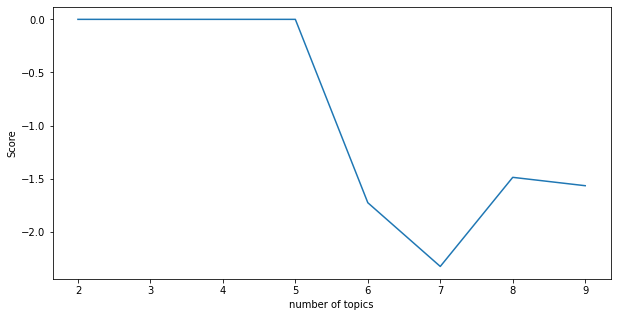

In [72]:
plt.figure(figsize = (10,5))
s = pd.Series(results_lsi.score.values, index=results_lsi.topic.values)
plt.xlabel("number of topics")
plt.ylabel("Score")
_ = s.plot()

# 5- Hierarchical Dirichlet Process (HDP)

In [73]:

hdp_model = HdpModel(bow_corpus,dictionary)

In [74]:
for idxh, topich in hdp_model.print_topics(num_topics=5, num_words=10):
    print('Topic: {} \nWords: {}'.format(idxh, topich))

Topic: 0 
Words: 0.057*واشنطن + 0.042*ليل + 0.032*يتم + 0.030*لي + 0.029*خاطر + 0.027*الله + 0.026*رسل + 0.024*حر + 0.023*جعل + 0.021*فجور
Topic: 1 
Words: 0.042*شبر + 0.040*حك + 0.035*برص + 0.034*شاهد + 0.031*علاج + 0.030*واحد + 0.027*سك + 0.026*سعودي + 0.024*كواليس + 0.023*استمر
Topic: 2 
Words: 0.067*برص + 0.036*مقرف + 0.034*تقدم + 0.027*خاطر + 0.026*قصة + 0.026*يانبع + 0.025*حقيق + 0.025*ليل + 0.023*حشيش + 0.022*إخوان
Topic: 3 
Words: 0.056*فجور + 0.036*اعداد + 0.035*حياة + 0.034*استمر + 0.028*سوري + 0.027*تقدم + 0.027*حمد + 0.026*الله + 0.026*عصام + 0.025*عمان
Topic: 4 
Words: 0.067*ندوة + 0.047*حمد + 0.033*يمن + 0.028*سابق + 0.025*يتم + 0.024*أربعاء + 0.024*حر + 0.024*ليبي + 0.024*بامريكا + 0.022*إخوان


### HDP coherence with  u_mass 

In [75]:

cm = CoherenceModel(model=hdp_model, corpus=bow_corpus, coherence='u_mass')
hdp_coherence_umass = cm.get_coherence()
print('\nCoherence Score u_mass: ', hdp_coherence_umass)


Coherence Score u_mass:  -22.80981189349504


### HDP coherence with  cv 

In [76]:

cm = CoherenceModel(model=hdp_model, corpus=bow_corpus, coherence='c_v', texts = processed_docs)
hdp_coherence_cv = cm.get_coherence()
print('\nCoherence Score c_v: ', hdp_coherence_cv)


Coherence Score c_v:  0.6757975859893164


### HDP coherence with  c_uci

In [77]:
from gensim.models import CoherenceModel
cm = CoherenceModel(model=hdp_model, corpus=bow_corpus, coherence='c_uci', texts = processed_docs)
hdp_coherence_uci = cm.get_coherence()
print('\nCoherence Score c_uci: ', hdp_coherence_uci)


Coherence Score c_uci:  -20.035817610325168


### HDP coherence with  c_nmpi

In [78]:

cm = CoherenceModel(model=hdp_model, corpus=bow_corpus, coherence='c_npmi', texts = processed_docs)
hdp_coherence_nmpi = cm.get_coherence()
print('\nCoherence Score c_npmi: ', hdp_coherence_nmpi)


Coherence Score c_npmi:  -0.655963128383878


# 6- Non-Negative Matrix Factorization(NMF) :

In [79]:

processed_docs = ' '.join(str(v) for v in processed_docs)
reshaped_text = arabic_reshaper.reshape(processed_docs)
bidi_text = get_display(reshaped_text)

In [80]:
# We only need the Headlines text column from the data
#the count vectorizer module needs string inputs, not array, so I join them with a space. This is a very quick operation.
train_headlines_sentences =[processed_docs]

In [81]:
train_headlines_sentences 

["['هنأ', 'دكتور', 'حمد', 'جمال', 'دين', 'قياد', 'حزب', 'مناسب', 'صدور', 'أولى', 'رواية'] ['برادع', 'يستقوى', 'بامريكا', 'مرةاخرى', 'رسل', 'عصام', 'عرى', 'واشنطن', 'مقرف'] ['حر', 'عدال', 'شاهد', 'ليل', 'اتحاد', 'ألام', 'استقصاء', 'تناول', 'سرار', 'كواليس', 'تعرض', 'أول', 'حقيق'] ['والد', 'اقولها', 'خاطر', 'حشيش', 'ضحك', 'اقولها', 'الله', 'كيل', 'أعطى', 'محاضر', 'فسق', 'فجور', 'جنوب', 'شيش', 'يانبع', 'حنان'] ['انتخب', 'العرص', 'انتخب', 'برص', 'مرسى', 'رئيسى', 'رئيسى'] ['امير', 'لي', 'علا', 'يتقال', 'ستريكر', 'صريح', 'كاريوكي', 'سك'] ['حك', 'حدث', 'فت', 'بين', 'كبير', 'حدث', 'غلط', 'واحد', 'استمر', 'قصة', 'يتم'] ['دع', 'حضور', 'ندوة', 'ثقاف', 'أربعاء', 'مركز', 'اعداد', 'قادة', 'تفاصيل'] ['عود', 'جماع', 'إخوان', 'حياة', 'سياسة', 'نفس', 'وضع', 'سابق', 'مستحيل', 'والطرمخة', 'جرائم', 'ماضي', 'جعل', 'تقدم', 'شبر'] ['علاج', 'سكر', 'نتشورال', 'سعودي', 'عراق', 'يمن', 'كويت', 'عمان', 'سوري', 'ليبي']"]

In [82]:
vectorizer = CountVectorizer();
x_counts = vectorizer.fit_transform(train_headlines_sentences);

In [83]:
transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts)

In [84]:
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

In [85]:
#obtain a NMF model.
modelNMF = NMF(n_components=10, init=None);
#fit the model
modelNMF.fit(xtfidf_norm)

NMF(init=None, n_components=10)

In [86]:
def get_nmf_topics(modelNMF, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(10):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = modelNMF.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [87]:
get_nmf_topics(modelNMF, 20)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,اقولها,تقدم,برص,يانبع,عود,ندوة,دكتور,مرةاخرى,جنوب,ضحك
1,انتخب,استمر,فت,لي,سرار,العرص,برادع,يمن,حياة,استمر
2,رئيسى,سابق,حقيق,ليل,اتحاد,نفس,رئيسى,مرسى,أعطى,جماع
3,حدث,ستريكر,مرةاخرى,عرى,سك,حياة,صدور,علا,كواليس,دع
4,إخوان,مناسب,علاج,جماع,محاضر,مستحيل,علاج,حمد,أولى,كبير
5,امير,جماع,عدال,حضور,شاهد,كاريوكي,جمال,والطرمخة,حك,حياة
6,حشيش,جرائم,واحد,أعطى,استقصاء,علا,والطرمخة,حك,سعودي,يمن
7,ليبي,أول,مركز,ضحك,رئيسى,أولى,كبير,الله,مستحيل,قصة
8,رواية,نفس,يمن,شيش,حمد,وضع,سياسة,بين,وضع,قادة
9,مقرف,يستقوى,صريح,فجور,والد,برص,فسق,والد,صريح,والطرمخة


In [88]:

nmf = GensimNmf(
    corpus=bow_corpus,
    num_topics=5,
    id2word=dictionary,
    chunksize=1000,
    passes=5,
    eval_every=10,
    minimum_probability=0,
    random_state=0,
    kappa=1,
)

C:\Users\PRO\AppData\Roaming\Python\Python39\site-packages\gensim\models\nmf.py:571: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
C:\Users\PRO\AppData\Roaming\Python\Python39\site-packages\gensim\models\nmf.py:588: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  if isinstance(corpus, collections.Iterator) and self.passes > 1:
C:\Users\PRO\AppData\Roaming\Python\Python39\site-packages\gensim\models\nmf.py:600: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
C:\Users\PRO\AppData\Roaming\Python\Python39\site-packages\gensim\models\nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.spars

### NMF coherence with Umass

In [89]:
cm = CoherenceModel(model=nmf,dictionary=id2word, corpus=bow_corpus, coherence='u_mass')
nmf_coherence_uMass = cm.get_coherence()
print('\nCoherence Score u_mass: ', nmf_coherence_uMass)


Coherence Score u_mass:  -12.664218011462255


### NMF coherence with C_nmpi

In [90]:
documents = data['text'].values
texts = [[word for word in str(document).split()] for document in documents]
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]

cm = CoherenceModel(model=nmf,texts=texts,dictionary=id2word, corpus=bow_corpus, coherence='c_npmi')
nmf_coherence_cnmpi = cm.get_coherence()
print('\nCoherence Score c_npmi: ', nmf_coherence_cnmpi)


Coherence Score c_npmi:  -0.2563636005240045


### NMF coherence with c_uci

In [91]:
documents = data['text'].values
texts = [[word for word in str(document).split()] for document in documents]
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]
cm = CoherenceModel(model=nmf,texts=texts,dictionary=id2word, corpus=bow_corpus, coherence='c_uci')
nmf_coherence_cuci = cm.get_coherence()
print('\nCoherence Score c_uci: ', nmf_coherence_cuci)


Coherence Score c_uci:  -9.201128015182338


### NMF coherence with cv

In [92]:
documents = data['text'].values
texts = [[word for word in str(document).split()] for document in documents]
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]
cm = CoherenceModel(model=nmf,texts=texts,dictionary=id2word, corpus=bow_corpus, coherence='c_v')
nmf_coherence_cv = cm.get_coherence()
print('\nCoherence Score c_cv: ', nmf_coherence_cv)


Coherence Score c_cv:  0.39626292306354577


# 7- Pachinko allocation (PAM)

In [93]:

k = 5
mdl = tp.PAModel(k1=5, k2=25)
for line in [processed_docs]:
    mdl.add_doc(line.strip().split())

for i in range(10,100,10):
    mdl.train(100)
    print('Iteration: {}\tLog-likelihood: {}'.format( i,mdl.ll_per_word))

# save into file
#mdl.save('sample_PAM_model.bin')

# load from file
#mdl = tp.PAModel.load('sample_PAM_model.bin')
for s in range(mdl.k):
    if not mdl.get_sub_topics(s): continue
    print('Top 10 words of topic #{}'.format(s))
    print(mdl.get_topic_words(k,top_n=10))  


Iteration: 10	Log-likelihood: -8.697644575225583
Iteration: 20	Log-likelihood: nan
Iteration: 30	Log-likelihood: nan
Iteration: 40	Log-likelihood: nan
Iteration: 50	Log-likelihood: nan
Iteration: 60	Log-likelihood: nan
Iteration: 70	Log-likelihood: nan
Iteration: 80	Log-likelihood: nan
Iteration: 90	Log-likelihood: nan
Top 10 words of topic #0
[("'اقولها',", 0.009345795027911663), ("'حدث',", 0.009345795027911663), ("['هنأ',", 0.009345795027911663), ("'دكتور',", 0.009345795027911663), ("'حمد',", 0.009345795027911663), ("'جمال',", 0.009345795027911663), ("'دين',", 0.009345795027911663), ("'قياد',", 0.009345795027911663), ("'حزب',", 0.009345795027911663), ("'مناسب',", 0.009345795027911663)]
Top 10 words of topic #1
[("'اقولها',", 0.009345795027911663), ("'حدث',", 0.009345795027911663), ("['هنأ',", 0.009345795027911663), ("'دكتور',", 0.009345795027911663), ("'حمد',", 0.009345795027911663), ("'جمال',", 0.009345795027911663), ("'دين',", 0.009345795027911663), ("'قياد',", 0.009345795027911663

### PAM coherence with Umass

In [94]:

coh = tp.coherence.Coherence(mdl, coherence='u_mass')
PAM_umass_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(mdl.k)]
print('==== Coherence : {} ===='.format('u_mass'))
print('Average:', PAM_umass_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : u_mass ====
Average: -1.1102230246251565e-16 
Per Topic: [-1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16]



### PAM coherence C_uci

In [95]:

coh = tp.coherence.Coherence(mdl, coherence='c_uci')
PAM_cuci_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(mdl.k)]
print('==== Coherence : {} ===='.format('c_uci'))
print('Average:', PAM_cuci_coherence, '\nPer Topic:', coherence_per_topic)
print()


==== Coherence : c_uci ====
Average: -6.040275876788976 
Per Topic: [-6.040275876788976, -6.040275876788976, -6.040275876788976, -6.040275876788976, -6.040275876788976]



### PAM coherence with c_nmpi

In [96]:

coh = tp.coherence.Coherence(mdl, coherence='c_npmi')
PAM_cnpmi_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(mdl.k)]
print('==== Coherence : {} ===='.format('c_npmi'))
print('Average:', PAM_cnpmi_coherence, '\nPer Topic:', coherence_per_topic)
print()


==== Coherence : c_npmi ====
Average: 0.10369340698910308 
Per Topic: [0.10369340698910307, 0.10369340698910307, 0.10369340698910307, 0.10369340698910307, 0.10369340698910307]



### PAM coherence with cv

In [97]:

coh = tp.coherence.Coherence(mdl, coherence='c_v')
PAM_cv_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(mdl.k)]
print('==== Coherence : {} ===='.format('c_v'))
print('Average:', PAM_cv_coherence, '\nPer Topic:', coherence_per_topic)
print()


==== Coherence : c_v ====
Average: 0.3162277638912201 
Per Topic: [0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201]



# 8- Hierarchical Pachinko allocation (HPAM)

In [98]:

k = 5
mdlH = tp.HPAModel(k1=5, k2=25)

for line in [processed_docs]:
    mdlH.add_doc(line.strip().split())

for i in range(10,100,10):
    mdlH.train(100)
    print('Iteration: {}\tLog-likelihood: {}'.format( i,mdlH.ll_per_word))

# save into file
#mdl.save('sample_PAM_model.bin')

# load from file
#mdl = tp.PAModel.load('sample_PAM_model.bin')
for s in range(mdlH.k):
    if not mdlH.get_sub_topics(s): continue
    print('Top 10 words of topic #{}'.format(s))
    print(mdlH.get_topic_words(k,top_n=10))  



Iteration: 10	Log-likelihood: -2.2492008485293034
Iteration: 20	Log-likelihood: 16.56817130878602
Iteration: 30	Log-likelihood: 28.835790332962134
Iteration: 40	Log-likelihood: 50.42644481495057
Iteration: 50	Log-likelihood: 49.25375047064634
Iteration: 60	Log-likelihood: 87.8912382876808
Iteration: 70	Log-likelihood: 88.48241788829856
Iteration: 80	Log-likelihood: 87.53285239002061
Iteration: 90	Log-likelihood: 125.00209886079159
Top 10 words of topic #0
[("'اقولها',", 0.009345795027911663), ("'حدث',", 0.009345795027911663), ("['هنأ',", 0.009345795027911663), ("'دكتور',", 0.009345795027911663), ("'حمد',", 0.009345795027911663), ("'جمال',", 0.009345795027911663), ("'دين',", 0.009345795027911663), ("'قياد',", 0.009345795027911663), ("'حزب',", 0.009345795027911663), ("'مناسب',", 0.009345795027911663)]
Top 10 words of topic #1
[("'اقولها',", 0.009345795027911663), ("'حدث',", 0.009345795027911663), ("['هنأ',", 0.009345795027911663), ("'دكتور',", 0.009345795027911663), ("'حمد',", 0.00934579

### HPAM coherence with Umass

In [99]:

coh = tp.coherence.Coherence(mdlH, coherence='u_mass')
HPAM_umass_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(mdlH.k)]
print('==== Coherence : {} ===='.format('u_mass'))
print('Average:', HPAM_umass_coherence, '\nPer Topic:', coherence_per_topic)
print()


==== Coherence : u_mass ====
Average: -1.1102230246251565e-16 
Per Topic: [-1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16]



### HPAM coherence with C_uci

In [100]:

coh = tp.coherence.Coherence(mdlH, coherence='c_uci')
HPAM_cuci_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(mdlH.k)]
print('==== Coherence : {} ===='.format('c_uci'))
print('Average:', HPAM_cuci_coherence, '\nPer Topic:', coherence_per_topic)
print()


==== Coherence : c_uci ====
Average: -14.600013634047892 
Per Topic: [-6.040275876788976, -19.988310322302674, -15.706894455339352, -14.82609748720111, -16.438490028607347]



### HPAM coherence with C_nmpi

In [101]:

coh = tp.coherence.Coherence(mdlH, coherence='c_npmi')
HPAM_cnmpi_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(mdlH.k)]
print('==== Coherence : {} ===='.format('c_npmi'))
print('Average:', HPAM_cnmpi_coherence, '\nPer Topic:', coherence_per_topic)
print()


==== Coherence : c_npmi ====
Average: -0.37352435677417056 
Per Topic: [0.10369340698910307, -0.6891221115797148, -0.38418603199784523, -0.4681924897956003, -0.4298145574867957]



### HPAM coherence with CV

In [102]:

coh = tp.coherence.Coherence(mdlH, coherence='c_v')
HPAM_cv_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(mdlH.k)]
print('==== Coherence : {} ===='.format('c_v'))
print('Average:', HPAM_cv_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.3162277638912201 
Per Topic: [0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201]



# 9- Dirichlet Multinomial Regression(DMR)

In [103]:

corpus = tp.utils.Corpus()

mdlD = tp.DMRModel(tw=tp.TermWeight.ONE, 
    k=20,
    corpus=corpus)

for line in [processed_docs]:
    mdlD.add_doc(line.strip().split())

for i in range(10,100,10):
    mdlD.train(100)
    print('Iteration: {}\tLog-likelihood: {}'.format( i,mdlD.ll_per_word))



Iteration: 10	Log-likelihood: -8.944056787348668
Iteration: 20	Log-likelihood: -8.957104729197988
Iteration: 30	Log-likelihood: -8.884842822687068
Iteration: 40	Log-likelihood: -8.915286818707209
Iteration: 50	Log-likelihood: -8.894755308200187
Iteration: 60	Log-likelihood: -8.987022952544033
Iteration: 70	Log-likelihood: -8.897879774930006
Iteration: 80	Log-likelihood: -8.949034478788802
Iteration: 90	Log-likelihood: -8.907220589424218


In [104]:
for i in range(0, 2000, 20):
    print('Iteration: {:04} LL per word: {:.4}'.format(i, mdlD.ll_per_word))
    mdlD.train(20)
print('Iteration: {:04} LL per word: {:.4}'.format(2000, mdlD.ll_per_word))

mdlD.summary()

Iteration: 0000 LL per word: -8.907
Iteration: 0020 LL per word: -8.877
Iteration: 0040 LL per word: -8.868
Iteration: 0060 LL per word: -8.913
Iteration: 0080 LL per word: -8.955
Iteration: 0100 LL per word: -8.901
Iteration: 0120 LL per word: -8.978
Iteration: 0140 LL per word: -8.995
Iteration: 0160 LL per word: -8.971
Iteration: 0180 LL per word: -8.93
Iteration: 0200 LL per word: -8.987
Iteration: 0220 LL per word: -8.937
Iteration: 0240 LL per word: -8.909
Iteration: 0260 LL per word: -8.931
Iteration: 0280 LL per word: -8.93
Iteration: 0300 LL per word: -8.99
Iteration: 0320 LL per word: -8.911
Iteration: 0340 LL per word: -8.986
Iteration: 0360 LL per word: -8.905
Iteration: 0380 LL per word: -8.914
Iteration: 0400 LL per word: -8.929
Iteration: 0420 LL per word: -8.934
Iteration: 0440 LL per word: -8.933
Iteration: 0460 LL per word: -8.97
Iteration: 0480 LL per word: -8.888
Iteration: 0500 LL per word: -8.95
Iteration: 0520 LL per word: -8.926
Iteration: 0540 LL per word: -8.9

### DMR coherence with U_mass

In [105]:
coh = tp.coherence.Coherence(mdlD, coherence='u_mass')
DMR_umass_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(mdlD.k)]
print('==== Coherence : {} ===='.format('u_mass'))
print('Average:', DMR_umass_coherence, '\nPer Topic:', coherence_per_topic)
print()


==== Coherence : u_mass ====
Average: -1.1102230246251565e-16 
Per Topic: [-1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16]



### DMR coherence with C_V

In [106]:
coh = tp.coherence.Coherence(mdlD, coherence='c_v')
DMR_cv_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(mdlD.k)]
print('==== Coherence : {} ===='.format('c_v'))
print('Average:', DMR_cv_coherence, '\nPer Topic:', coherence_per_topic)
print()


==== Coherence : c_v ====
Average: 0.3162277638912201 
Per Topic: [0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201, 0.3162277638912201]



### DMR coherence with UMASS

In [107]:
coh = tp.coherence.Coherence(mdlD, coherence='c_uci')
DMR_cuci_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(mdlD.k)]
print('==== Coherence : {} ===='.format('c_uci'))
print('Average:', DMR_cuci_coherence, '\nPer Topic:', coherence_per_topic)
print()


==== Coherence : c_uci ====
Average: -11.934726738849127 
Per Topic: [-6.019580703129422, -5.974902582564758, -8.680971718971374, -15.704303616103308, -5.397843712117679, -10.8378447566027, -19.85369055490832, -20.410385663554614, -15.821717790297427, -15.818049426299753, -6.040275876788976, -6.040275876788976, -5.4143897935139185, -16.542882866440166, -8.619023995409949, -10.913662575920672, -16.37859762295415, -17.349834653911387, -13.391538484738188, -13.484762505966824]



### DMR coherence with C_nmpi

In [108]:

coh = tp.coherence.Coherence(mdlD, coherence='c_npmi')
DMR_cnmpi_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(mdlD.k)]
print('==== Coherence : {} ===='.format('c_npmi'))
print('Average:', DMR_cnmpi_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_npmi ====
Average: -0.24481016250720988 
Per Topic: [0.09583784058098008, 0.10605934540122101, -0.06941444980290847, -0.5277514652045715, 0.12779116326816503, -0.2232027373185943, -0.6523603433984148, -0.6911969202252989, -0.40942861572394607, -0.43234237692694505, 0.10369340698910307, 0.10369340698910307, 0.1435327323503183, -0.45221587754264997, -0.06647638141385384, -0.22727813466697425, -0.5504859566161212, -0.4989568682886411, -0.39897077933275776, -0.37673023926141064]



# 10-  Adversarial-neural Topic Model(ATM)

In [109]:
model = AuthorTopicModel(
        corpus=bow_corpus, id2word=dictionary, num_topics=4
    )

In [110]:
for indx, topics in model.print_topics(num_topics=5, num_words=10):
    print('Topic: {} \nWords: {}'.format(indx, topics))

Topic: 0 
Words: 0.012*"واشنطن" + 0.011*"نفس" + 0.011*"يتم" + 0.011*"جنوب" + 0.011*"سوري" + 0.011*"انتخب" + 0.011*"واحد" + 0.011*"استقصاء" + 0.011*"الله" + 0.010*"رواية"
Topic: 1 
Words: 0.012*"جعل" + 0.012*"ماضي" + 0.011*"العرص" + 0.011*"حدث" + 0.011*"انتخب" + 0.011*"ليل" + 0.011*"حر" + 0.011*"تعرض" + 0.011*"محاضر" + 0.011*"علاج"
Topic: 2 
Words: 0.012*"خاطر" + 0.011*"امير" + 0.011*"حمد" + 0.011*"فسق" + 0.011*"اقولها" + 0.011*"نفس" + 0.011*"ألام" + 0.011*"وضع" + 0.011*"عراق" + 0.011*"شبر"
Topic: 3 
Words: 0.011*"رئيسى" + 0.011*"حدث" + 0.011*"والد" + 0.011*"محاضر" + 0.011*"سوري" + 0.011*"والطرمخة" + 0.011*"كيل" + 0.011*"اتحاد" + 0.010*"واحد" + 0.010*"حر"


### ATM coherence with UMass

In [111]:

coherence_model_ATM = CoherenceModel(model=model, dictionary=dictionary, coherence='u_mass',corpus=bow_corpus)
coherence_ATM_uMass = coherence_model_ATM.get_coherence()
print('\nCoherence Score with UMASS: ', coherence_ATM_uMass)


Coherence Score with UMASS:  -22.295689078081942


### ATM coherence with CV

In [112]:
# Compute Coherence Score
documents = data['text'].values
texts = [[word for word in str(document).split()] for document in documents]
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]

coherence_model_ATM = CoherenceModel(model=model, dictionary=id2word, corpus=bow_corpus, coherence='c_v', texts = texts)
coherence_ATM_CV = coherence_model_ATM.get_coherence()
print('\nCoherence Score with CV: ', coherence_ATM_CV)


Coherence Score with CV:  0.5839480041250008


### ATM coherence with c_uci

In [113]:
documents = data['text'].values
texts = [[word for word in str(document).split()] for document in documents]
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]
cm = CoherenceModel(model=model,texts=texts,dictionary=id2word, corpus=bow_corpus, coherence='c_uci')
ATM_coherence_cuci = cm.get_coherence()
print('\nCoherence Score c_uci: ', ATM_coherence_cuci)



Coherence Score c_uci:  -12.195774781149046


### ATM coherence with c_nmpi 

In [114]:
documents = data['text'].values
texts = [[word for word in str(document).split()] for document in documents]
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]
cm = CoherenceModel(model=model,texts=texts,dictionary=id2word, corpus=bow_corpus, coherence='c_npmi')
ATM_coherence_cnmpi = cm.get_coherence()
print('\nCoherence Score c_npmi: ', ATM_coherence_cnmpi)


Coherence Score c_npmi:  -0.41021696506177574


In [115]:
#process = pd.DataFrame(processed_docs)
    

In [116]:
type(data_text)

pandas.core.frame.DataFrame

# 11- Short for Gibbs Sampling Dirichlet Multinomial Mixture(GSDMM)

In [117]:
documents = data['text'].values
mgp = MovieGroupProcess(K=20, alpha=0.1, beta=0.1, n_iters=1)

# Transform documents
tokens = [doc.split() for doc in documents]

id2word = gensim.corpora.Dictionary(tokens)

y = mgp.fit(tokens ,len(id2word))

In stage 0: transferred 8062 clusters with 20 clusters populated


In [118]:
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)
print('*'*20)
# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()
print('Most important clusters (by number of docs inside):', top_index)
print('*'*20)
# Show the top 5 words in term frequency for each cluster 
for i in range(20):
    print("Cluster",i,':',sorted(mgp.cluster_word_distribution[i].items(), key=lambda item: item[1])[:10])

Number of documents per topic : [584 457 421 452 466 448 479 484 449 473 455 436 544 492 491 480 529 439
 526 588]
********************
Most important clusters (by number of docs inside): [ 2 11 17  5  8  3 10  1  4  9  6 15  7 14 13 18 16 12  0 19]
********************
Cluster 0 : [('حسني', 1), ('جمهورية', 1), ('حقوق', 1), ('نقطة', 1), ('الخطاب', 1), ('القيادي', 1), ('قائمة', 1), ('ستنتصر', 1), ('بسمة', 1), ('ياسيسى', 1)]
Cluster 1 : [('شاب', 1), ('العظيم', 1), ('قيام', 1), ('عنه', 1), ('تعيين', 1), ('التفاصيل', 1), ('بمناسبة', 1), ('الأشخاص', 1), ('مشكلة', 1), ('بإذن', 1)]
Cluster 2 : [('المعادى', 1), ('الأحمر', 1), ('السادة', 1), ('المحترمون', 1), ('حملات', 1), ('مكان', 1), ('البرلمان', 1), ('الشرطة', 1), ('سلام', 1), ('بالشرقية', 1)]
Cluster 3 : [('خارج', 1), ('الليلة', 1), ('الاخوان', 1), ('6', 1), ('اذا', 1), ('البرلمان', 1), ('السياسي', 1), ('مقال', 1), ('لفهم', 1), ('الدين', 1)]
Cluster 4 : [('عمرو', 1), ('حمزاوي', 1), ('اتحاد', 1), ('مقال', 1), ('دعمرو', 1), ('الحكومة', 1), ('

In [119]:
def get_topics_lists(model, top_clusters, n_words):
    '''
    Gets lists of words in topics as a list of lists.
    
    model: gsdmm instance
    top_clusters:  numpy array containing indices of top_clusters
    n_words: top n number of words to include
    
    '''
    # create empty list to contain topics
    topics = []
    
    # iterate over top n clusters
    for cluster in top_clusters:
        #create sorted dictionary of word distributions
        sorted_dict = sorted(model.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:n_words]
         
        #create empty list to contain words
        topic = []
        
        #iterate over top n words in topic
        for k,v in sorted_dict:
            #append words to topic list
            topic.append(k)
            
        #append topics to topics list    
        topics.append(topic)
    
    return topics

### GSDMM coherence with u_mass

In [120]:
documents = data['text'].values
texts = [[word for word in str(document).split()] for document in documents]
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]
topics = get_topics_lists(mgp, top_index, 20) 

# evaluate model using Topic Coherence score
cm_gsdmm = CoherenceModel(topics=topics, 
                          dictionary=id2word, 
                          corpus=bow_corpus, 
                          texts=documents, 
                          coherence='u_mass')

# get coherence value
coherence_gsdmm_u_mass = cm_gsdmm.get_coherence()  

print(coherence_gsdmm_u_mass)

-5.258983163709287


### GSDMM coherence with C_uci

In [121]:
documents = data['text'].values
texts = [[word for word in str(document).split()] for document in documents]
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]
topics = get_topics_lists(mgp, top_index, 20) 

# evaluate model using Topic Coherence score
cm_gsdmm = CoherenceModel(topics=topics, 
                          dictionary=id2word, 
                          corpus=bow_corpus, 
                          texts=documents, 
                          coherence='c_uci')

# get coherence value
coherence_gsdmm_cuci = cm_gsdmm.get_coherence()  

print(coherence_gsdmm_cuci)


inf


### GSDMM coherence with c_nmpi

In [122]:
documents = data['text'].values
texts = [[word for word in str(document).split()] for document in documents]
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]
topics = get_topics_lists(mgp, top_index, 20) 

# evaluate model using Topic Coherence score
cm_gsdmm = CoherenceModel(topics=topics, 
                          dictionary=id2word, 
                          corpus=bow_corpus, 
                          texts=documents, 
                          coherence='c_npmi')

# get coherence value
coherence_gsdmm_nmpi = cm_gsdmm.get_coherence()  

print(coherence_gsdmm_nmpi)


inf


### GSDMM coherence with CV

In [123]:
documents = data['text'].values
texts = [[word for word in str(document).split()] for document in documents]
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]
topics = get_topics_lists(mgp, top_index, 20) 

# evaluate model using Topic Coherence score
cm_gsdmm = CoherenceModel(topics=topics, 
                          dictionary=id2word, 
                          corpus=bow_corpus, 
                          texts=documents, 
                          coherence='c_v')

# get coherence value
coherence_gsdmm_cv = cm_gsdmm.get_coherence()  

print(coherence_gsdmm_cv)


nan


# Evaluation models using grid_search

# comparison by score

In [124]:
models = pd.DataFrame({
    'Model': ['LDA', 'LSI','HDP','NMF','ATM','LDA_SEQ','PAM','GSDMM','HPAM','DMR'], 'Score_by_CV': [coherence_lda_cv, coherence_lsi_cv,hdp_coherence_cv,nmf_coherence_cv,coherence_ATM_CV,ldaseq_cv,PAM_cv_coherence,coherence_gsdmm_cv,HPAM_cv_coherence,DMR_cv_coherence], 'Score_by_uMass': [coherence_lda_uMass, coherence_lsi_umass,hdp_coherence_umass,nmf_coherence_uMass,coherence_ATM_uMass,ldaseq_umass,PAM_umass_coherence,coherence_gsdmm_u_mass,HPAM_umass_coherence,DMR_umass_coherence]
      , 'Score_by_cuci': [coherence_lda_uci, coherence_lsi_uci,hdp_coherence_uci,nmf_coherence_cuci,ATM_coherence_cuci,ldaseq_cuci,PAM_cuci_coherence,coherence_gsdmm_cuci,HPAM_cuci_coherence,DMR_cuci_coherence], 'Score_by_cnpmi': [coherence_lda_npmi, coherence_lsi_nmpi,hdp_coherence_nmpi,nmf_coherence_cnmpi,ATM_coherence_cnmpi,ldaseq_cnmpi,PAM_cnpmi_coherence,coherence_gsdmm_nmpi,HPAM_cnmpi_coherence,DMR_cnmpi_coherence]})

#print(models)
models.sort_values(by='Score_by_CV', ascending=False)





,Model,Score_by_CV,Score_by_uMass,Score_by_cuci,Score_by_cnpmi
2,HDP,0.675798,-2.280981e+01,-20.035818,-0.655963
4,ATM,0.583948,-2.229569e+01,-12.195775,-0.410217
0,LDA,0.508884,-1.960954e+01,-16.484590,-0.424421
3,NMF,0.396263,-1.266422e+01,-9.201128,-0.256364
5,LDA_SEQ,0.339985,-1.549034e+01,-13.180757,-0.201067
6,PAM,0.316228,-1.110223e-16,-6.040276,0.103693
8,HPAM,0.316228,-1.110223e-16,-14.600014,-0.373524
9,DMR,0.316228,-1.110223e-16,-11.934727,-0.244810
1,LSI,0.258165,-1.478381e+01,-12.537342,-0.146074
7,GSDMM,NaN,-5.258983e+00,inf,inf


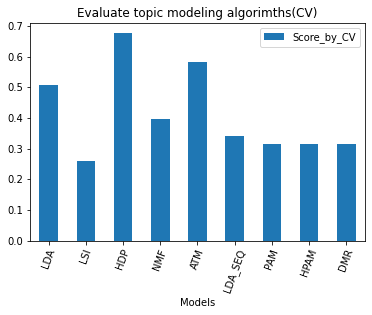

In [125]:

# A python dictionary

data = {"Models":['LDA', 'LSI','HDP','NMF','ATM','LDA_SEQ','PAM','HPAM','DMR'],

        "Score_by_CV":[coherence_lda_cv, coherence_lsi_cv,hdp_coherence_cv,nmf_coherence_cv,coherence_ATM_CV,ldaseq_cv,PAM_cv_coherence,HPAM_cv_coherence,DMR_cv_coherence]

        };

# Dictionary loaded into a DataFrame       

dataFrame = pd.DataFrame(data=data);

 

# Draw a vertical bar chart

dataFrame.plot.bar(x="Models", y="Score_by_CV", rot=70, title="Evaluate topic modeling algorimths(CV)");

plt.show(block=True);

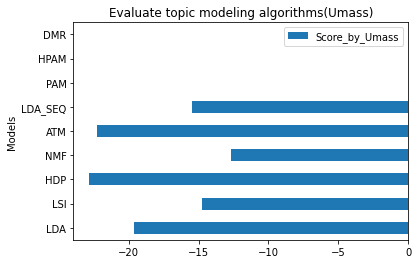

In [126]:
# A python dictionary

data = {"Models":['LDA', 'LSI','HDP','NMF','ATM','LDA_SEQ','PAM','HPAM','DMR'],

        "Score_by_Umass":[coherence_lda_uMass, coherence_lsi_umass,hdp_coherence_umass,nmf_coherence_uMass,coherence_ATM_uMass,ldaseq_umass,PAM_umass_coherence,HPAM_umass_coherence,DMR_umass_coherence]

        };

# Dictionary loaded into a DataFrame       

dataFrame = pd.DataFrame(data=data);

 

# Draw a vertical bar chart

dataFrame.plot.barh(x="Models", y="Score_by_Umass", title="Evaluate topic modeling algorithms(Umass)");

plt.show(block=True);

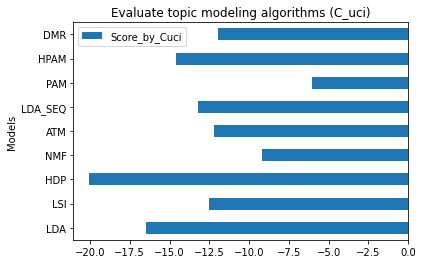

In [127]:
# A python dictionary

data = {"Models":['LDA', 'LSI','HDP','NMF','ATM','LDA_SEQ','PAM','HPAM','DMR'],

        "Score_by_Cuci":[coherence_lda_uci, coherence_lsi_uci,hdp_coherence_uci,nmf_coherence_cuci,ATM_coherence_cuci,ldaseq_cuci,PAM_cuci_coherence,HPAM_cuci_coherence,DMR_cuci_coherence]

        };

# Dictionary loaded into a DataFrame       

dataFrame = pd.DataFrame(data=data);

 

# Draw a vertical bar chart

dataFrame.plot.barh(x="Models", y="Score_by_Cuci", title="Evaluate topic modeling algorithms (C_uci)");

plt.show(block=True);